### Importing the necessary libraries to perform Linear Regression

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#### Loading the dataset
Sklearn has an inbuilt dataset library which we are going to use

In [35]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Transforming the dataset into a Dataframe.
Because the above data is hard to read so a dataframe would be super easy to visualize the data

In [36]:
df_x = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
df_y = pd.DataFrame(boston_data['target'])

### Understanding the basic statistics

In [37]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [38]:
df_y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### Exploratory Data Analysis
#### Exploratory Data Analysis is very important before train our model to understand the relationships of our target variable "Target" and other features

Using the seaborn library to make our visuals and also a correlations matrix to understand the linear relationships between our variables

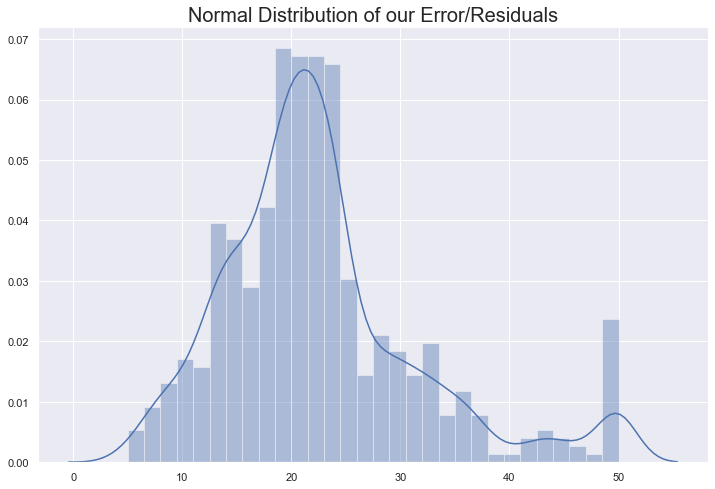

In [56]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(boston_data['target'], bins=30)
plt.title("Normal Distribution of our Error/Residuals", fontsize=20)
plt.show()

### We can clearly see that our values of our TARGET VARIABLE "target" is normally distributed with few outliers at the end 

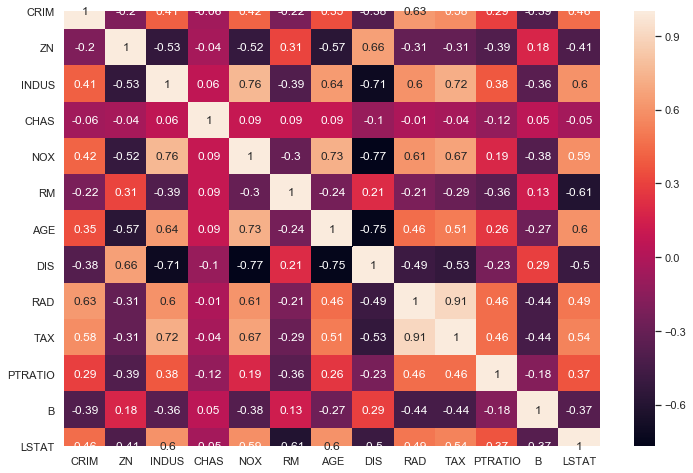

In [45]:
corr_matrix = df_x.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

#### This matrix helps us understand which are the variables that are strongly correlated with our variables which are close to 1 and -1 are the opposite ones. 

#### One has to also understand in Linear regression, Multicollinearity plays a major role as the independent varibales shouldn't be correlated.

#### Intialize the linear regresison model

In [47]:
reg = linear_model.LinearRegression()

### Splitting the data into Training 70% and Testing the data 30%

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = .3, random_state=0)

### Now Training the Model with our Data

In [59]:
reg = reg.fit(x_train, y_train)

#### Looking at our coefficients for each feature

In [60]:
reg.coef_

array([[-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,
         2.51124642e+00, -1.62312529e+01,  3.85906801e+00,
        -9.98516565e-03, -1.50026956e+00,  2.42143466e-01,
        -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
        -4.86738066e-01]])

####  Making predictions on our test dataset

#### Predicted values 

In [61]:
y_pred = reg.predict(x_test)
y_pred

array([[24.9357079 ],
       [23.75163164],
       [29.32638296],
       [11.97534566],
       [21.37272478],
       [19.19148525],
       [20.5717479 ],
       [21.21154015],
       [19.04572003],
       [20.35463238],
       [ 5.44119126],
       [16.93688709],
       [17.15482272],
       [ 5.3928209 ],
       [40.20270696],
       [32.31327348],
       [22.46213268],
       [36.50124666],
       [31.03737014],
       [23.17124551],
       [24.74815321],
       [24.49939403],
       [20.6595791 ],
       [30.4547583 ],
       [22.32487164],
       [10.18932894],
       [17.44286422],
       [18.26103077],
       [35.63299326],
       [20.81960303],
       [18.27218007],
       [17.72047628],
       [19.33772473],
       [23.62254823],
       [28.97766856],
       [19.45036239],
       [11.13170639],
       [24.81843595],
       [18.05294835],
       [15.59712226],
       [26.21043403],
       [20.81140432],
       [22.17349382],
       [15.48367365],
       [22.62261604],
       [24

#### Printing the actual values

In [62]:
y_test

,0
329,22.6
371,50.0
219,23.0
403,8.3
78,21.2
...,...
4,36.2
428,11.0
385,7.2
308,22.8


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Evaluating the Model Performance 

In [77]:
#Model evaluation for training set
y_train_predict = reg.predict(x_train)
root_mean_square_error = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set is:")
print(f"RMSE is {root_mean_square_error}")
print(f"R2 score is {r2}")
print("\n")

#Model evaluation for testing set
y_test_predict1 = reg.predict(x_test)
root_mean_square_error1 = (np.sqrt(mean_squared_error(y_test, y_test_predict1)))
r2 = r2_score(y_test, y_test_predict1)

print("The model performance for Testing set is:")
print(f"RMSE is {root_mean_square_error1}")
print(f"R2 score is {r2}")

The model performance for training set is:
RMSE is 4.4674623461466405
R2 score is 0.7645451026942549


The model performance for Testing set is:
RMSE is 5.214975145375406
R2 score is 0.6733825506400193


### At the End we used to two meaures to evaluate our model performance RMSE and R2.

RMSE:- is the prediction of our errors between the predicted values and the observed values. The lower the RMSE the better it is for us to predict the data accurately. 

R2:- R-squared is the variance of the dependent variable explanied by the Independent variable. The higher the R2 value the better explanation our model has done. Sometimes R2 can fool us with a higher value doesn't necessarily mean a good model, maybe a lower R2 model can be less biased. One needs to look at the residuals plot for this.
A better prediction measure would be Adjusted R2.